# **Import Library**

In [1]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
print(keras.__version__)

2.18.0
3.7.0


# **Import Dataset**

In [3]:
# Load all dataset to Pandas DataFrame
user_df = pd.read_csv("../Dataset/old_users_data_with_links.csv", sep=';')
tourism_df = pd.read_csv("../Dataset/new_tourism_with_id_links_3.csv")
rating_df = pd.read_csv("../Dataset/new_tourism_rating_comments.csv")

In [4]:
print("old_users_data.csv"),               display(user_df.sample(3)),     print("\n")
print("new_tourism_rating_comments.csv"),  display(rating_df.sample(3)),   print("\n")
print("new_tourism_with_id_links.csv"),    display(tourism_df.sample(3))

old_users_data.csv


,User_Id,Full_Name,Age,Email,Password,Img_Path
254,255,Carrol Lapere,30,clapere72@yale.edu,dY7}}iIf,User\ProfilePicture (181).jpg
96,97,Josephine Cancott,38,jcancott2o@cdc.gov,bH9&r1PZ9%h1,User\ProfilePicture (97).jpg
28,29,Tamara Gladdor,34,tgladdors@netlog.com,sG3$f#M3yYTet',User\ProfilePicture (29).jpg




new_tourism_rating_comments.csv


,User_Id,Place_Id,Place_Ratings,Comment
7017,220,391,1,"Seriusan deh, Flower Farm Setiya Aji tuh menge..."
1431,46,55,2,Aku sebenernya berharap lebih dari Klenteng Ji...
2497,80,355,3,"Buat refreshing, Umbul Sidomukti masih oke lah..."




new_tourism_with_id_links.csv


,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
170,171,Candi Ijo,Budaya,"Candi Ijo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦆꦗꦺꦴ, translit. ...",Yogyakarta,5000,"4,6",60.0,"{'lat': -7.783827600000001, 'lng': 110.5118987}",-7.783828,110.511899,images_output\Candi Ijo\Candi Ijo_0.jpg,images_output\Candi Ijo\Candi Ijo_1.jpg,NaN
409,410,Ciputra Waterpark,Taman Hiburan,Ciputra Waterpark Surabaya – Bermain air di wa...,Surabaya,95000,"4,3",90.0,"{'lat': -7.2861707, 'lng': 112.6333338}",-7.286171,112.633334,images_output\Ciputra Waterpark\Ciputra Waterp...,images_output\Ciputra Waterpark\Ciputra Waterp...,NaN
237,238,Gunung Manglayang,"Taman Hiburan, Cagar Alam",Gunung Manglayang adalah sebuah gunung bertipe...,Bandung,7500,"4,5",NaN,"{'lat': -6.876111099999999, 'lng': 107.7436111}",-6.876111,107.743611,images_output\Gunung Manglayang\Gunung Manglay...,images_output\Gunung Manglayang\Gunung Manglay...,images_output\Gunung Manglayang\Gunung Manglay...


(None, None)

# **Data Assessment**


## **`user_df`**

In [5]:
user_df.sample(5)

,User_Id,Full_Name,Age,Email,Password,Img_Path
259,260,Ker Bigmore,33,kbigmore77@bandcamp.com,"dP5(FFxp6F}0""l",User\ProfilePicture (181).jpg
191,192,Boyce Moller,37,bmoller5b@kickstarter.com,jN5>DIi_){)j0C9f,User\ProfilePicture (181).jpg
13,14,Gail Stodd,26,gstoddd@imgur.com,mC0.Y%6_|,User\ProfilePicture (14).jpg
214,215,Ranique Cassey,23,rcassey5y@tiny.cc,dW1>pNi?CW>7,User\ProfilePicture (181).jpg
47,48,Codee Arkill,35,carkill1b@xrea.com,dG0+TP4r|5,User\ProfilePicture (48).jpg


In [6]:
# View variable information in users data
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_Id    300 non-null    int64 
 1   Full_Name  300 non-null    object
 2   Age        300 non-null    int64 
 3   Email      300 non-null    object
 4   Password   300 non-null    object
 5   Img_Path   300 non-null    object
dtypes: int64(2), object(4)
memory usage: 14.2+ KB


In [7]:
# View the number of unique data in each users data variable
print("Number of unique data:")
print(user_df.nunique())

Number of unique data:
User_Id      300
Full_Name    300
Age           23
Email        300
Password     300
Img_Path     181
dtype: int64


In [8]:
# See the number of empty data in each users data variable
print("Number of empty data:")
print(user_df.isna().sum())

Number of empty data:
User_Id      0
Full_Name    0
Age          0
Email        0
Password     0
Img_Path     0
dtype: int64


In [9]:
# View the number of duplicate data in each row of seller data
print("Number of duplicate rows:", end=" ")
print(user_df.duplicated().sum())

Number of duplicate rows: 0


In [10]:
# View descriptive parameter data from each numeric variable of seller data
user_df.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


## **`tourism_df`**

In [11]:
tourism_df.sample(3)

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
251,252,Kampoeng Tulip,Taman Hiburan,Kampoeng Tulip ialah salah satu objek wisata d...,Bandung,15000,"3,8",60.0,"{'lat': -6.963162, 'lng': 107.66195}",-6.963162,107.661950,images_output\Kampoeng Tulip\Kampoeng Tulip_0.jpg,images_output\Kampoeng Tulip\Kampoeng Tulip_1.jpg,NaN
298,299,Sendang Geulis Kahuripan,Cagar Alam,Wilayah ini lebih tepatnya berada di RPH Cikal...,Bandung,10000,"4,3",120.0,"{'lat': -6.7495268, 'lng': 107.478658}",-6.749527,107.478658,images_output\Sendang Geulis Kahuripan\Sendang...,NaN,NaN
325,326,Taman Kupu-Kupu Cihanjuang,"Cagar Alam, Kebun Binatang","Taman Kupu-Kupu Cihanjuang Bandung ini,seperti...",Bandung,10000,4,NaN,"{'lat': -6.8590047, 'lng': 107.568779}",-6.859005,107.568779,images_output\Taman Kupu-Kupu Cihanjuang\Taman...,NaN,NaN


In [12]:
# View variable information in tourism data
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   Description   437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    object 
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Img_Path_0    437 non-null    object 
 12  Img_Path_1    358 non-null    object 
 13  Img_Path_2    166 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 47.9+ KB


In [13]:
# View the number of unique data in each tourism data variable
print("Number of unique data:")
print(tourism_df.nunique())

Number of unique data:
Place_Id        437
Place_Name      437
Category         26
Description     437
City              5
Price            50
Rating           14
Time_Minutes     15
Coordinate      437
Lat             437
Long            437
Img_Path_0      432
Img_Path_1      353
Img_Path_2      164
dtype: int64


In [14]:
# See the number of empty data in each tourism data variable
print("Number of empty data:")
print(tourism_df.isna().sum())

Number of empty data:
Place_Id          0
Place_Name        0
Category          0
Description       0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Img_Path_0        0
Img_Path_1       79
Img_Path_2      271
dtype: int64


In [15]:
# View the number of duplicate data in each row of tourism data
print("Number of duplicate rows:", end=" ")
print(tourism_df.duplicated().sum())

Number of duplicate rows: 0


In [16]:
# View all unique categories
categories_set = set()
for data in tourism_df['Category'].tolist():
  categories = data.split(', ')
  for category in categories:
    categories_set.add(category)

print(f'Number of categories: {len(categories_set)}')
for index, data in enumerate(categories_set):
  print(index, data)

Number of categories: 9
0 Bahari
1 Taman Hiburan
2 Cagar Alam
3 Pusat Perbelanjaan
4 Situs Sejarah
5 Budaya
6 Teater & Pertunjukan
7 Tempat Ibadah
8 Kebun Binatang


In [17]:
# View descriptive parameter data of each numeric variable of customer data
tourism_df.describe()

,Place_Id,Price,Time_Minutes,Lat,Long
count,437.000000,437.000000,205.000000,437.000000,437.000000
mean,219.000000,24652.173913,82.609756,-7.095438,109.160142
std,126.295289,66446.374709,52.872339,0.727241,1.962848
min,1.000000,0.000000,10.000000,-8.197894,103.931398
25%,110.000000,0.000000,45.000000,-7.749590,107.578369
50%,219.000000,5000.000000,60.000000,-7.020524,110.237468
75%,328.000000,20000.000000,120.000000,-6.829411,110.431869
max,437.000000,900000.000000,360.000000,1.078880,112.821662


## **`rating_df`**

In [18]:
rating_df.sample(3)

,User_Id,Place_Id,Place_Ratings,Comment
431,16,73,2,"Sayang banget Museum Perangko kurang terawat, ..."
6145,192,370,3,"Buat refreshing, Benteng Pendem masih oke lah,..."
9572,299,105,3,"Candi Donotirto biasa aja sih menurutku, tapi ..."


In [19]:
# View variable information in rating data
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        9597 non-null   int64 
 1   Place_Id       9597 non-null   int64 
 2   Place_Ratings  9597 non-null   int64 
 3   Comment        9597 non-null   object
dtypes: int64(3), object(1)
memory usage: 300.0+ KB


In [20]:
# View the number of unique data in each rating data variable
print("Number of unique data:")
print(rating_df.nunique())

Number of unique data:
User_Id           300
Place_Id          437
Place_Ratings       5
Comment          7118
dtype: int64


In [21]:
# See the number of empty data in each rating data variable
print("Number of empty data:")
print(rating_df.isna().sum())

Number of empty data:
User_Id          0
Place_Id         0
Place_Ratings    0
Comment          0
dtype: int64


In [22]:
# View the number of duplicate data in each row of rating data
print("Number of duplicate rows:", end=" ")
print(rating_df.duplicated().sum())

Number of duplicate rows: 0


In [23]:
# View descriptive parameter data of each numeric variable of rating data
rating_df.describe()

,User_Id,Place_Id,Place_Ratings
count,9597.000000,9597.000000,9597.000000
mean,151.046681,219.356049,3.066688
std,86.141501,126.126850,1.381008
min,1.000000,1.000000,1.000000
25%,76.000000,109.000000,2.000000
50%,150.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


# **Data Cleaning**

## **`user_df`**

In [24]:
# Only keep necessary columns
user_df = user_df[['User_Id', 'Full_Name', 'Age']].copy()
user_df.head(3)

,User_Id,Full_Name,Age
0,1,Corey Bloxsom,20
1,2,Koo Houtby,21
2,3,Haydon Coldrick,23


## **`tourism_df`**

In [25]:
# Only keep necessary columns
columns = ['Place_Id', 'Place_Name', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes']
tourism_df = tourism_df[columns].copy()
tourism_df.head(3)

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes
0,1,Monumen Nasional,"Budaya, Situs Sejarah",Jakarta,20000,"4,6",15.0
1,2,Kota Tua,Budaya,Jakarta,0,"4,6",90.0
2,3,Dunia Fantasi,"Taman Hiburan, Bahari",Jakarta,270000,"4,6",360.0


In [26]:
# Convert Rating columns with commas to proper float format
tourism_df['Rating'] = tourism_df['Rating'].replace(',', '.', regex=True)
tourism_df['Rating'] = tourism_df['Rating'].astype(dtype='float64')
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   City          437 non-null    object 
 4   Price         437 non-null    int64  
 5   Rating        437 non-null    float64
 6   Time_Minutes  205 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 24.0+ KB


In [27]:
# Fill missing Time_Minutes with the median
tourism_df.fillna({'Time_Minutes': tourism_df['Time_Minutes'].median()}, inplace=True)

## **`rating_df`**

In [28]:
# Only keep necessary columns
rating_df = rating_df[['User_Id', 'Place_Id', 'Place_Ratings']].copy()
rating_df.head(3)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5


# **Explanatory Data Analysis**

## **`user_df`**

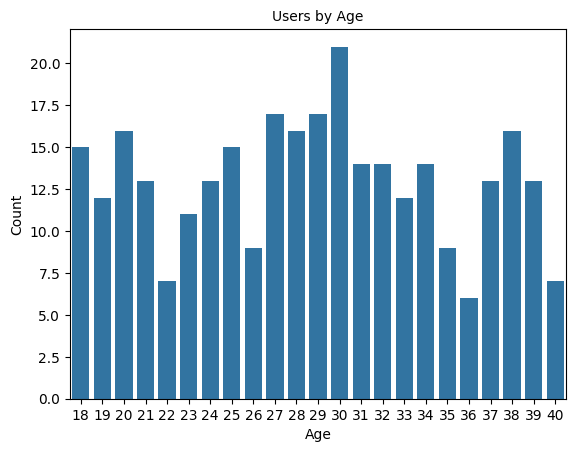

In [29]:
# View the distribution of user based on age
users_age_df = pd.DataFrame(user_df.groupby(by='Age')['User_Id'].nunique())
users_age_df.reset_index(inplace=True)
users_age_df.rename(columns={'User_Id': 'Count'}, inplace=True)

# Visualize the distribution of user based on age
sns.barplot(x='Age', y='Count', data=users_age_df.sort_values(by='Age', ascending=True))
plt.title('Users by Age', loc='center', fontsize=10)
plt.show()

## **`tourism_df`**

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Time_Minutes'}>, <Axes: >]], dtype=object)

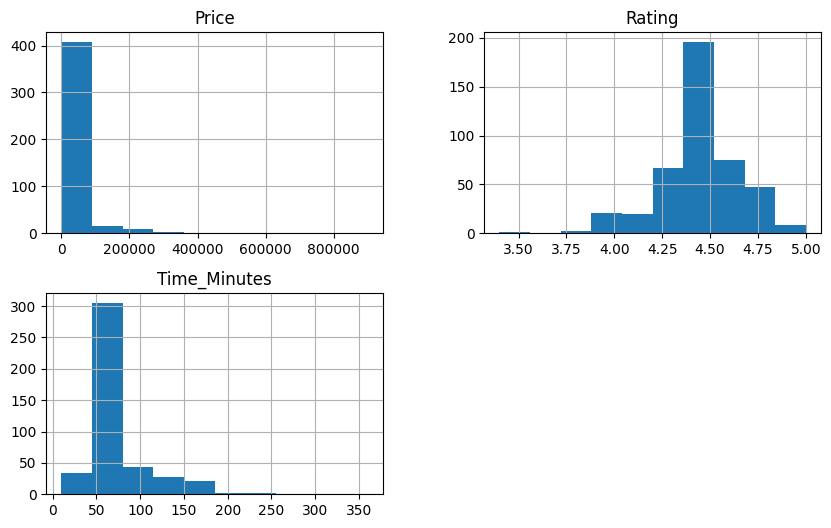

In [30]:
# View the distribution of numeric values
tourism_df[['Price', 'Rating', 'Time_Minutes']].hist(figsize=(10, 6))

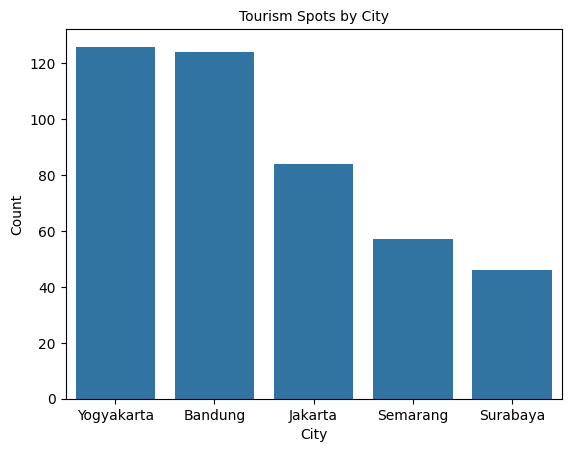

In [31]:
# View the distribution of tourism spots based on city
tourism_city_df = pd.DataFrame(tourism_df.groupby(by='City')['Place_Id'].nunique())
tourism_city_df.reset_index(inplace=True)
tourism_city_df.rename(columns={'Place_Id': 'Count'}, inplace=True)

# Visualize the distribution of tourism spots based on city
sns.barplot(x="City", y="Count", data=tourism_city_df.sort_values(by="Count", ascending=False))
plt.title("Tourism Spots by City", loc="center", fontsize=10)
plt.show()

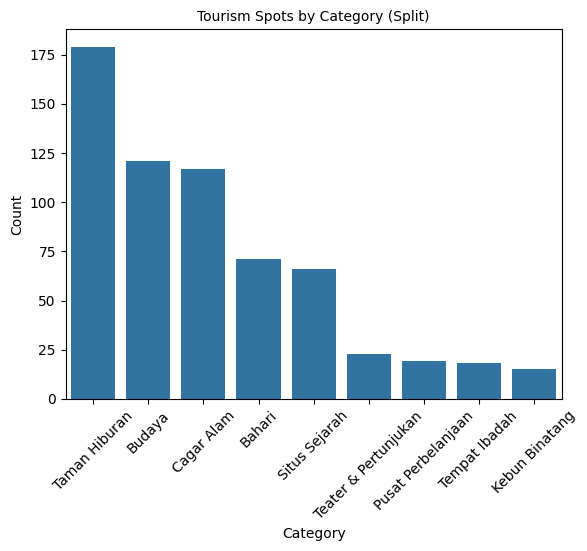

In [32]:
# View the distribution of tourism spots based on category
tourism_category_df = tourism_df.copy()
tourism_category_df['Category'] = tourism_category_df['Category'].str.split(', ')
tourism_category_df = tourism_category_df.explode('Category').groupby('Category').size().reset_index(name='Count')

# Visualize the distribution of tourism spots based on category
sns.barplot(x="Category", y="Count", data=tourism_category_df.sort_values(by="Count", ascending=False))
plt.title("Tourism Spots by Category (Split)", loc="center", fontsize=10)
plt.xticks(rotation=45)
plt.show()

## **`rating_df`**

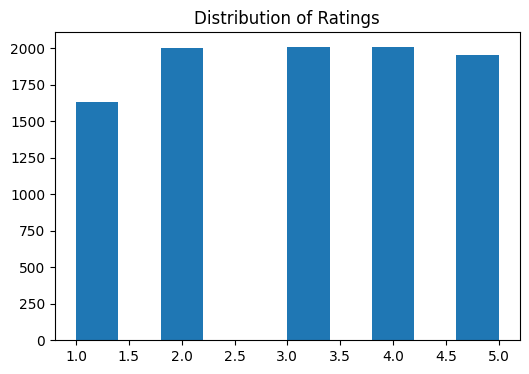

In [33]:
# View the distribution of user ratings
plt.figure(figsize=(6, 4))
plt.hist(rating_df['Place_Ratings'])
plt.title("Distribution of Ratings")
plt.show()

# **Data Preprocessing**

## **Create User Vector Basket**

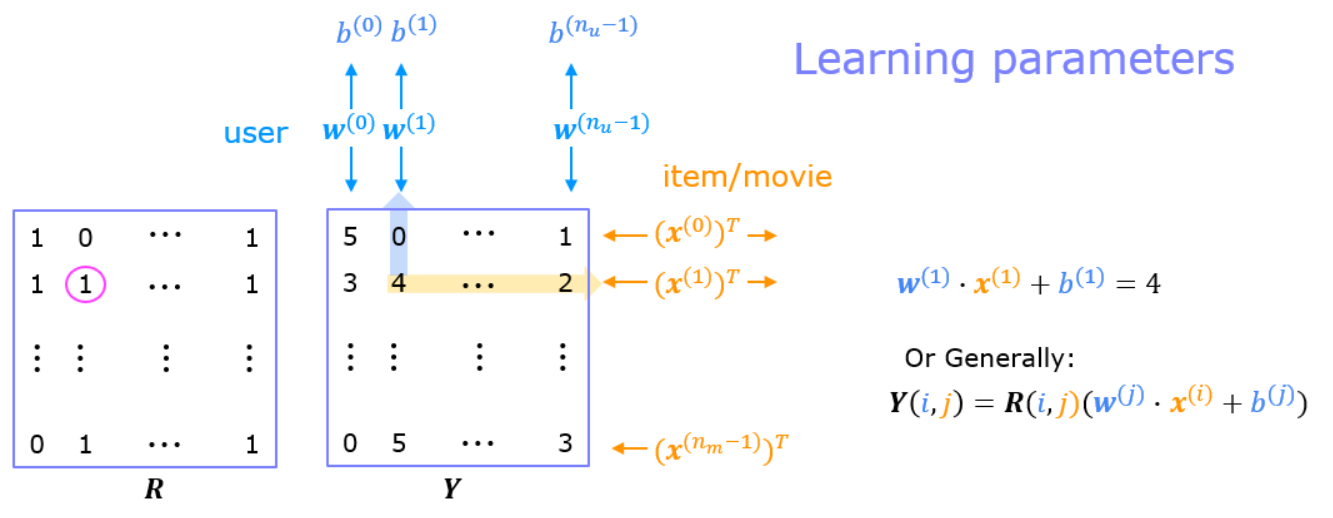

In [34]:
def get_user_vector_basket(rating_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:

  def encode_values(x):
    if x == 0:
      return 0
    if x > 0:
      return 1

  user_vector = rating_df.groupby(['Place_Id', 'User_Id'])['Place_Ratings']\
                .sum().unstack().reset_index().fillna(0).set_index('Place_Id')

  # Calculates the average rating only for values ​​greater than zero
  average_ratings = np.round(user_vector.replace(0, np.nan).mean(axis=1), 1)
  average_ratings = average_ratings.fillna(0)

  # Adding User_Id = 0 with the average in the leftmost column
  user_vector.insert(0, 0, average_ratings)

  # Encode user vector to 0 and 1
  user_vector_encoded = user_vector.map(encode_values)

  return user_vector, user_vector_encoded

In [35]:
# Create user vector basket
user_vector, user_vector_encoded = get_user_vector_basket(rating_df)
Y = user_vector.to_numpy(copy=True)
R = user_vector_encoded.to_numpy(copy=True)

display(user_vector)
display(user_vector_encoded)

User_Id,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
Place_Id,,,,,,,,,,,,,,,,,,,,,
1,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.8,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.9,0.0,0.0,0.0,4.0,3.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.5,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3.4,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,2.4,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


User_Id,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
Place_Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
434,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
def normalize_ratings(Y: np.ndarray, R:np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    Y_mean = (np.sum(Y * R, axis=1) / (np.sum(R, axis=1) + 1e-12)).reshape(-1,1)
    Y_norm = Y - np.multiply(Y_mean, R)
    return (Y_norm, Y_mean)

# Normalize the Dataset
Y_norm, Y_mean = normalize_ratings(Y, R)

In [37]:
# Save the normalize mean
np.save('Y_mean.npy', Y_mean)

# **Collaborative Filtering Model**

## **Custom Layer**

In [38]:
# Define the custom layer
@keras.saving.register_keras_serializable(package='CollaborativeFiltering')
class CollaborativeFilteringLayer(tf.keras.layers.Layer):

  def __init__(self, num_users, num_tourism, num_features, name='collaborative_filtering_layer', **kwargs):
    super(CollaborativeFilteringLayer, self).__init__(name=name, **kwargs)
    self.num_users = num_users
    self.num_tourism = num_tourism
    self.num_features = num_features

    self.X = self.add_weight(
      shape=(self.num_tourism, self.num_features),
      initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=tf.random.set_seed(42)),
      dtype=tf.float32,
      trainable=True,
      name='X'
    )

    self.W = self.add_weight(
      shape=(self.num_users, self.num_features),
      initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=tf.random.set_seed(42)),
      dtype=tf.float32,
      trainable=True,
      name='W'
    )

    self.b = self.add_weight(
      shape=(1, self.num_users),
      initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=tf.random.set_seed(42)),
      dtype=tf.float32,
      trainable=True,
      name='b'
    )

  def call(self, inputs):
    if tf.math.equal(inputs, tf.constant(-1, dtype=tf.int32)):  # inputs = id
      return tf.matmul(self.X, self.W, transpose_b=True) + self.b
    else:
      return tf.matmul(self.X, tf.reshape(self.W[inputs], (-1, 1))) + self.b[:, inputs]

  def get_config(self):
    # config = super(CollaborativeFilteringLayer, self).get_config()
    config = super().get_config()
    config.update({
        'num_users': self.num_users,
        'num_tourism': self.num_tourism,
        'num_features': self.num_features
    })
    return config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

## **Custom Model**

In [39]:
# Define the custom model
@keras.saving.register_keras_serializable(package='CollaborativeFiltering')
class CollaborativeFilteringModel(tf.keras.Model):
  def __init__(self, num_users, num_tourism, num_features, name='collaborative_filtering_model', **kwargs):
    super(CollaborativeFilteringModel, self).__init__(name=name, **kwargs)
    self.num_users = num_users
    self.num_tourism = num_tourism
    self.num_features = num_features
    self.collaborative_filtering = CollaborativeFilteringLayer(num_users, num_tourism, num_features)

  def call(self, inputs):
    return self.collaborative_filtering(inputs)

  def get_config(self):
    config = super().get_config()
    config.update({
        'num_users': self.num_users,
        'num_tourism': self.num_tourism,
        'num_features': self.num_features
    })
    return config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

In [40]:
# Cost function for collaborative filtering
def cofi_cost_function(X, W, R, Y_true, Y_pred, lambda_):
  loss = (Y_pred - Y_true) * R
  cost = 0.5 * tf.reduce_sum(loss**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
  return cost

## **Training**

In [41]:
# Importance variables
num_tourism, num_users = Y.shape
num_features = 64

# instantiate collaborative filtering and the optimizer
cofi = CollaborativeFilteringModel(num_users, num_tourism, num_features)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

In [42]:
inputs = tf.constant(-1, dtype=tf.int32)
cost_values = list()
epochs = 1500

# Make sure all tensors use float32 from the start
Y_norm = tf.constant(Y_norm, dtype=tf.float32)
lambda_ = tf.constant(1.0, dtype=tf.float32)

for epoch in range(1, epochs + 1):
    # Use TensorFlow’s GradientTape to record the operations used to compute the cost
    with tf.GradientTape() as tape:

        # Predict all the user ratings
        Y_pred = cofi(inputs)

        # Compute the cost (forward pass included in cost)
        cost_value = cofi_cost_function(cofi.layers[0].X, cofi.layers[0].W, R, Y_norm, Y_pred, lambda_)
        cost_values.append(cost_value.numpy())

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grads = tape.gradient( cost_value, [cofi.layers[0].X, cofi.layers[0].W, cofi.layers[0].b] )

    # Run one step of gradient descent by updating the value of the variables to minimize the loss.
    optimizer.apply_gradients( zip(grads, [cofi.layers[0].X, cofi.layers[0].W, cofi.layers[0].b]) )

    # Log periodically.
    if epoch % 20 == 0:
      print(f"Training loss at epoch {epoch}: {cost_value:0.1f}")

Training loss at epoch 20: 16832.7
Training loss at epoch 40: 7767.0
Training loss at epoch 60: 4650.6
Training loss at epoch 80: 3270.7
Training loss at epoch 100: 2563.3
Training loss at epoch 120: 2167.2
Training loss at epoch 140: 1932.2
Training loss at epoch 160: 1785.3
Training loss at epoch 180: 1688.9
Training loss at epoch 200: 1622.7
Training loss at epoch 220: 1575.5
Training loss at epoch 240: 1540.9
Training loss at epoch 260: 1514.7
Training loss at epoch 280: 1494.6
Training loss at epoch 300: 1478.9
Training loss at epoch 320: 1466.4
Training loss at epoch 340: 1456.4
Training loss at epoch 360: 1448.3
Training loss at epoch 380: 1441.7
Training loss at epoch 400: 1436.3
Training loss at epoch 420: 1431.8
Training loss at epoch 440: 1428.0
Training loss at epoch 460: 1424.9
Training loss at epoch 480: 1422.3
Training loss at epoch 500: 1420.0
Training loss at epoch 520: 1418.2
Training loss at epoch 540: 1416.6
Training loss at epoch 560: 1415.2
Training loss at epoch 

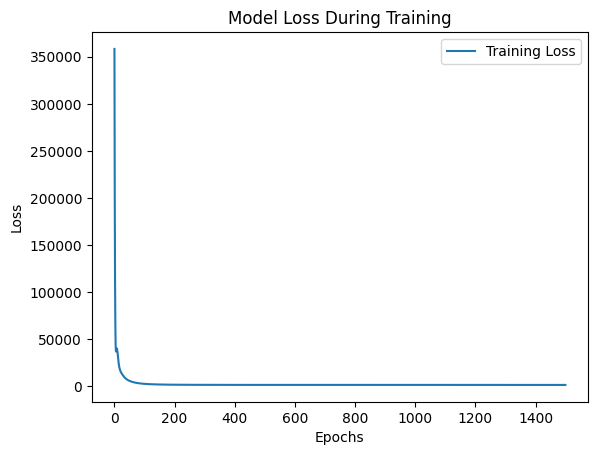

In [43]:
plt.plot(cost_values, label='Training Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Prediction**

In [44]:
# Make a prediction using trained weights and biases
def get_recommendations(cofi_layer, user_id):
  user_id = tf.constant(user_id, dtype=tf.int32)
  my_pred = cofi_layer(user_id)
  my_pred = my_pred + Y_mean # restore the mean
  my_pred = tf.reshape(my_pred, (-1))

  # sort predictions
  ix = tf.argsort(my_pred, direction='DESCENDING')

  return ix, my_pred

# Print recommendations
def print_recommendations(ix, my_pred, num_recom):
  for i, tourist_spots_idx in enumerate(ix):
    if i == num_recom:
      break
    j = tourist_spots_idx.numpy()
    print(f'Predicting rating {my_pred[j]:0.2f} for {tourism_df.loc[j, "Place_Name"]}')

In [45]:
# Print 20 recommendations
user_id = 120
num_recom = 20

ix, my_pred = get_recommendations(cofi, user_id)
print_recommendations(ix, my_pred, num_recom)

Predicting rating 4.89 for Puncak Segoro
Predicting rating 4.88 for Goa Rong
Predicting rating 4.87 for Wisata Agro Edukatif Istana Susu Cibugary
Predicting rating 4.85 for Museum Bahari Jakarta
Predicting rating 4.84 for Masjid Agung Ungaran
Predicting rating 4.84 for Pantai Ngobaran
Predicting rating 4.82 for Farm House Susu Lembang
Predicting rating 4.81 for Chingu Cafe Little Seoul
Predicting rating 4.71 for Pantai Baron
Predicting rating 4.62 for Tafso Barn
Predicting rating 4.52 for Taman Balai Kota Bandung
Predicting rating 4.49 for Monumen Nasional
Predicting rating 4.48 for Pantai Ngrenehan
Predicting rating 4.22 for Bunker Kaliadem Merapi
Predicting rating 4.19 for Monumen Yogya Kembali
Predicting rating 4.14 for Margasatwa Muara Angke
Predicting rating 4.14 for Wisata Lereng Kelir
Predicting rating 4.13 for Taman Pelangi Yogyakarta
Predicting rating 4.12 for Lawangwangi Creative Space
Predicting rating 4.12 for Water Blaster Bukit Candi Golf


## **Save and Load Model**

In [46]:
cofi.save("collaborative_filtering.h5")

In [47]:
reconstructed_cofi_model = tf.keras.models.load_model("collaborative_filtering.h5", custom_objects={
    'CollaborativeFilteringModel': CollaborativeFilteringModel,
    'CollaborativeFilteringLayer': CollaborativeFilteringLayer
})

user_id = 120
num_recom = 20

ix, my_pred = get_recommendations(reconstructed_cofi_model, user_id)
print_recommendations(ix, my_pred, num_recom)

Predicting rating 4.89 for Puncak Segoro
Predicting rating 4.88 for Goa Rong
Predicting rating 4.87 for Wisata Agro Edukatif Istana Susu Cibugary
Predicting rating 4.85 for Museum Bahari Jakarta
Predicting rating 4.84 for Masjid Agung Ungaran
Predicting rating 4.84 for Pantai Ngobaran
Predicting rating 4.82 for Farm House Susu Lembang
Predicting rating 4.81 for Chingu Cafe Little Seoul
Predicting rating 4.71 for Pantai Baron
Predicting rating 4.62 for Tafso Barn
Predicting rating 4.52 for Taman Balai Kota Bandung
Predicting rating 4.49 for Monumen Nasional
Predicting rating 4.48 for Pantai Ngrenehan
Predicting rating 4.22 for Bunker Kaliadem Merapi
Predicting rating 4.19 for Monumen Yogya Kembali
Predicting rating 4.14 for Margasatwa Muara Angke
Predicting rating 4.14 for Wisata Lereng Kelir
Predicting rating 4.13 for Taman Pelangi Yogyakarta
Predicting rating 4.12 for Lawangwangi Creative Space
Predicting rating 4.12 for Water Blaster Bukit Candi Golf
